*Import Useful Libraries*

In [48]:
import json
import numpy as np
import pandas as pd
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline

*Read Dataset*

In [49]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [50]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [51]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [52]:
col_names = heart_failure.columns[:-1]
target_col = ['DEATH_EVENT']
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
bin_cols = ['high_blood_pressure', 'smoking', 'sex', 'anaemia', 'diabetes']

*EDA*

In [53]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [54]:
heart_failure.shape

(299, 13)

In [55]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [56]:
heart_failure_summary = heart_failure.describe()

**Note:- Looking at at max and Q3 value, it seems like there are few outliers in the columns creatinine_phosphokinase, ejection_fraction, platelets and serum_creatinine**

In [57]:
heart_failure.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

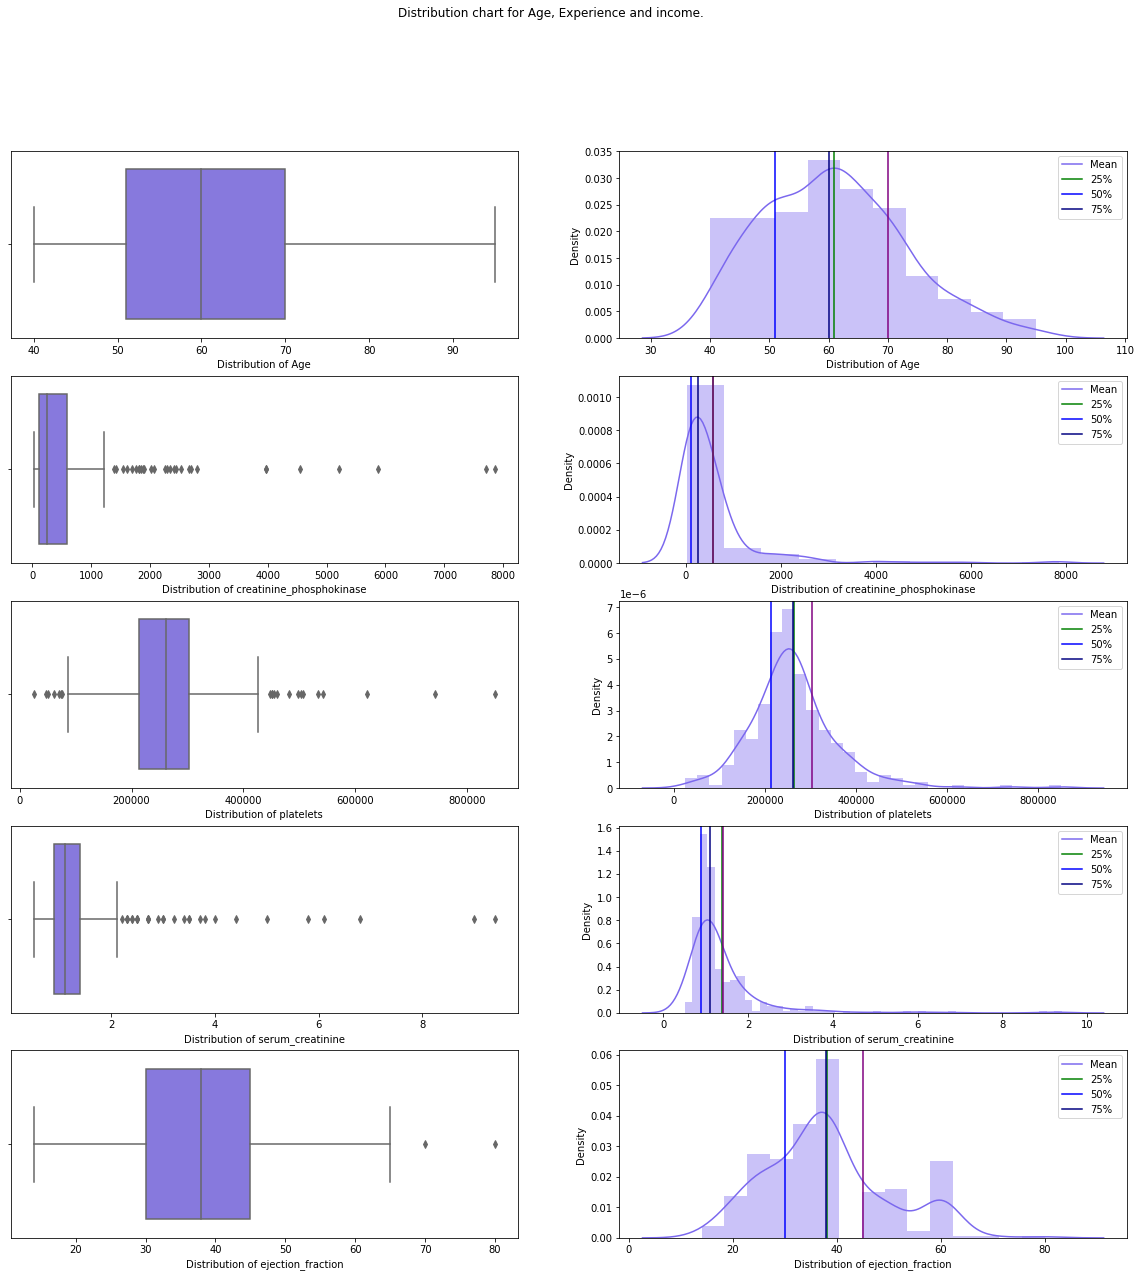

In [58]:
def draw_axvlines(plt, col):
  mean = heart_failure_summary.loc['mean', col]
  q1 = heart_failure_summary.loc['25%', col]
  q2 = heart_failure_summary.loc['50%', col]
  q3 = heart_failure_summary.loc['75%', col]
  plt.axvline(mean, color = 'g');
  plt.axvline(q1, color= 'b');
  plt.axvline(q2, color = 'navy');
  plt.axvline(q3, color = 'purple');
  plt.legend({'Mean':mean, '25%':q1, '50%':q2, '75%':q3});

fig, axes = plt.subplots(5,2, figsize = (20,20));
fig.suptitle('Distribution chart for Age, Experience and income.')  

# Create boxplot to show distribution of Age
sns.boxplot(heart_failure["age"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(heart_failure["age"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "age");

# Create boxplot to show distribution of creatinine_phosphokinase
sns.boxplot(heart_failure["creatinine_phosphokinase"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of creatinine_phosphokinase');

pp = sns.distplot(heart_failure["creatinine_phosphokinase"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of creatinine_phosphokinase');
draw_axvlines(pp, "creatinine_phosphokinase")


# Create boxplot to show distribution of platelets
sns.boxplot(heart_failure["platelets"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of platelets');

pp = sns.distplot(heart_failure["platelets"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of platelets');
draw_axvlines(pp, "platelets")

# Create boxplot to show distribution of serum_creatinine
sns.boxplot(heart_failure["serum_creatinine"], ax = axes[3][0], color = "mediumslateblue");
axes[3][0].set(xlabel = 'Distribution of serum_creatinine');

pp = sns.distplot(heart_failure["serum_creatinine"], ax = axes[3][1], color = "mediumslateblue");
axes[3][1].set(xlabel = 'Distribution of serum_creatinine');
draw_axvlines(pp, "serum_creatinine")

# Create boxplot to show distribution of ejection_fraction
sns.boxplot(heart_failure["ejection_fraction"], ax = axes[4][0], color = "mediumslateblue");
axes[4][0].set(xlabel = 'Distribution of ejection_fraction');

pp = sns.distplot(heart_failure["ejection_fraction"], ax = axes[4][1], color = "mediumslateblue");
axes[4][1].set(xlabel = 'Distribution of ejection_fraction');
draw_axvlines(pp, "ejection_fraction")

**Note:- As suspected, all four columns have lots of ouliers**

In [59]:
# A function that returns value counts for a column split by personal_loan
def groupby_get_cc_count(tdf, col):
    tdf = tdf.groupby([col, "DEATH_EVENT"])["DEATH_EVENT"].count().reset_index(level = 0)
    tdf.columns = [col, "count"]
    tdf = tdf.reset_index()
    return tdf

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

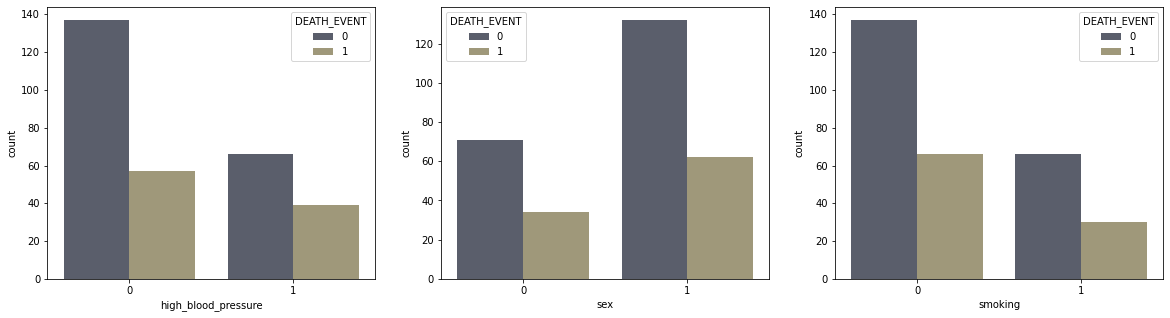

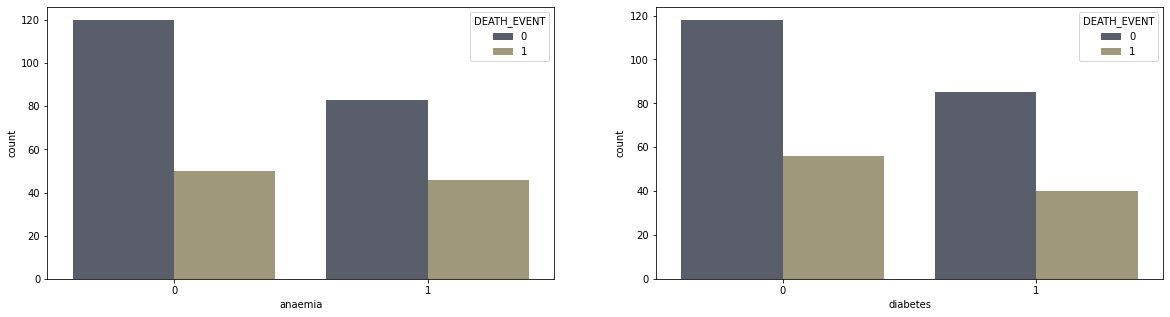

In [60]:
fig, axes = plt.subplots(1, 3, figsize = (20,5));

for ix, i in enumerate(["high_blood_pressure", "sex", "smoking"]):
    xx = groupby_get_cc_count(heart_failure[[i, "DEATH_EVENT"]], i)
    sns.barplot(xx[i], xx["count"], hue = xx["DEATH_EVENT"], palette = "cividis", ax = axes[ix]);
    
fig, axes = plt.subplots(1, 2, figsize = (20,5));

for ix, i in enumerate(["anaemia", "diabetes"]):
    xx = groupby_get_cc_count(heart_failure[[i, "DEATH_EVENT"]], i)
    sns.barplot(xx[i], xx["count"], hue = xx["DEATH_EVENT"], palette = "cividis", ax = axes[ix]);

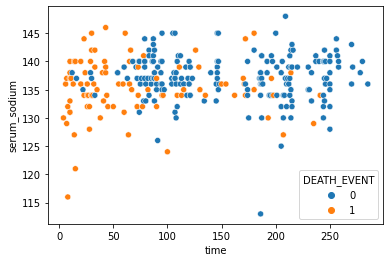

In [61]:
sns.scatterplot(x = "time", y = "serum_sodium", data = heart_failure[["serum_sodium", "time", "DEATH_EVENT"]], hue = "DEATH_EVENT");

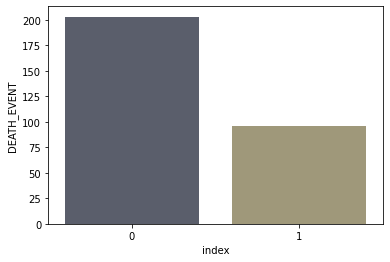

In [62]:
xx = heart_failure[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "DEATH_EVENT", data=xx, palette = "cividis");

*SMOTE(Synthetic Minority Oversampling Technique) for Balancing Data*

In [44]:
col_names = list(heart_failure.columns)
col_names.remove(target_col[0])

X = heart_failure[col_names]
y = heart_failure[target_col[0]]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


heart_failure = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
heart_failure.columns = col_names + target_col
heart_failure


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0.000000,582.000000,0.000000,20.000000,1.000000,265000.000000,1.900000,130.000000,1.000000,0.000000,4.000000,1
1,55.000000,0.000000,7861.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,136.000000,1.000000,0.000000,6.000000,1
2,65.000000,0.000000,146.000000,0.000000,20.000000,0.000000,162000.000000,1.300000,129.000000,1.000000,1.000000,7.000000,1
3,50.000000,1.000000,111.000000,0.000000,20.000000,0.000000,210000.000000,1.900000,137.000000,1.000000,0.000000,7.000000,1
4,65.000000,1.000000,160.000000,1.000000,20.000000,0.000000,327000.000000,2.700000,116.000000,0.000000,0.000000,8.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,63.945254,0.210949,198.208882,1.000000,52.109492,0.789051,189265.694922,1.021095,140.421898,0.789051,0.000000,29.843797,1
402,69.391099,0.000000,536.502179,0.869634,36.303662,0.130366,228912.563745,3.369634,134.130366,0.869634,0.000000,41.081131,1
403,71.464478,1.000000,124.840478,0.000000,53.556299,0.292896,355979.223766,2.090818,135.242627,0.292896,0.292896,66.568359,1
404,57.797191,0.323676,968.931765,0.000000,25.000000,0.676324,271971.027327,0.932368,133.236758,1.000000,0.323676,46.739246,1


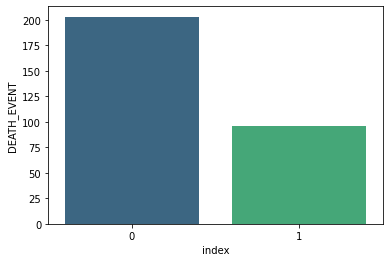

In [63]:
xx = heart_failure[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "DEATH_EVENT", data=xx, palette = "viridis")

In [24]:
heart_failure_train = heart_failure

**Preprocessing**

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [65]:
scaled = std.fit_transform(heart_failure[num_cols])

In [66]:
scaled = pd.DataFrame(scaled, columns=num_cols)

heart_failure_train = pd.concat([scaled, heart_failure[bin_cols + target_col]], axis=1)

heart_failure_train.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,high_blood_pressure,smoking,sex,anaemia,diabetes,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1,0,1,0,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,1,0,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,1,1,0,0,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,0,0,1,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,0,0,0,1,1,1


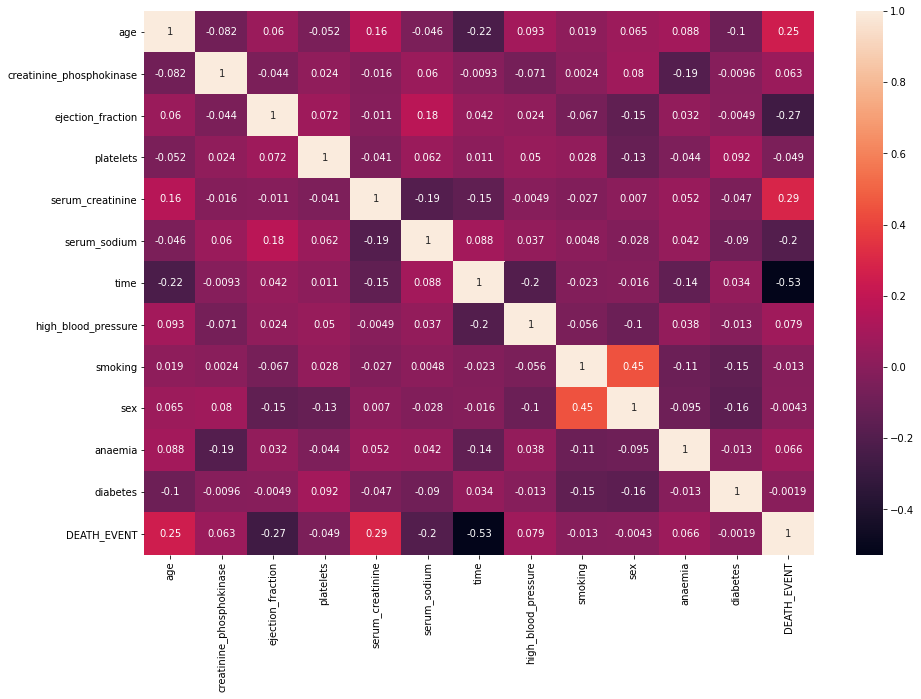

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_failure_train.corr(), annot=True, fmt='.2g');

*Models*

[0.09482665 0.07931293 0.13107047 0.07076137 0.11899109 0.08681263
 0.28599391 0.02356502 0.02651854 0.02507151 0.02722963 0.02984624]


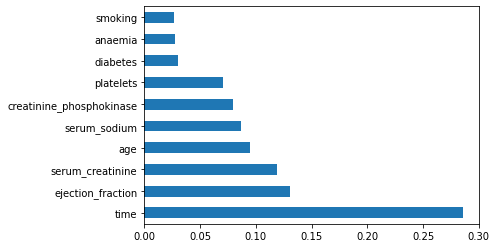

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

col_names = list(heart_failure_train.columns)
col_names.remove(target_col[0])

X = heart_failure_train[col_names]
y = heart_failure_train[target_col[0]]

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

*Train Test Split Data*

In [69]:
col_names = ['age', "serum_creatinine", "serum_sodium", "ejection_fraction", "time"]
X = heart_failure_train[col_names]      # Contains the independent columns 
y = heart_failure_train[target_col]     # Our target column

In [70]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_y = train_y[target_col[0]]
test_y = test_y[target_col[0]]

*Final Model Building*

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
conf_matrix_all = {}
a = []
def death_event_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    global a
    algo.fit(training_x,training_y)                           # Fit the training data set to the algorithm passed.
    predictions = algo.predict(testing_x)                     # Get all predictions
    probabilities = algo.predict_proba(testing_x)             # Get probablities of predictions

    conf_matrix = confusion_matrix(testing_y, predictions)    # Get confusion matrix using the predictions
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       # Save confusion matrix values to a dictionary
    a = conf_matrix    
    
    print("Classification report:")                           # Print the classification report
    print(classification_report(testing_y, predictions))
  
    model_roc_auc = roc_auc_score(testing_y, predictions)           # Get the Area under the curve number
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   # Get False postive rate and true positive rate

    print ("Area under the curve: ", model_roc_auc)
    print(accuracy_score(testing_y, predictions))
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(25, 5))
        conf_matrix = np.flip(conf_matrix)
        
        conf_2 = conf_matrix.astype(str)
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_2, labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);

        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(fpr, tpr, ax=axes[1])                                         # Plot the ROC curve
        plt.plot([0, 1], [0, 1],'--')                                              # Plot the diagonal line
        axes[1].set_xlim([0, 1])                                                   # Set x-axis limit to 0 and 1
        axes[1].set_ylim([0, 1])                                                   # Set y-axis limit to 0 and 1
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();                                      

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60

Area under the curve:  0.7457142857142858
0.7833333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


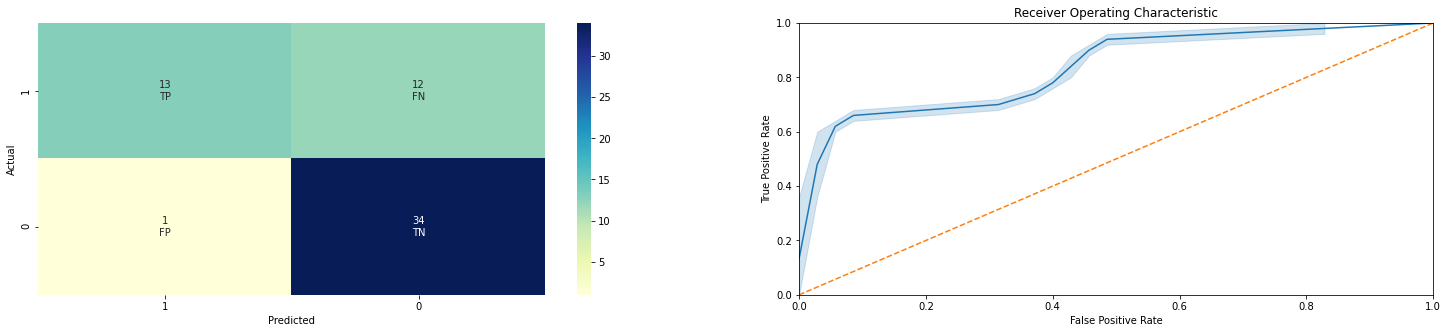

In [73]:
lr  = LogisticRegression(C=1e2, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l2")

death_event_prediction("Logistic Regression", lr, train_X, test_X, train_y, test_y, plot = True)

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        35
           1       0.83      0.40      0.54        25

    accuracy                           0.72        60
   macro avg       0.76      0.67      0.67        60
weighted avg       0.75      0.72      0.69        60

Area under the curve:  0.6714285714285714
0.7166666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


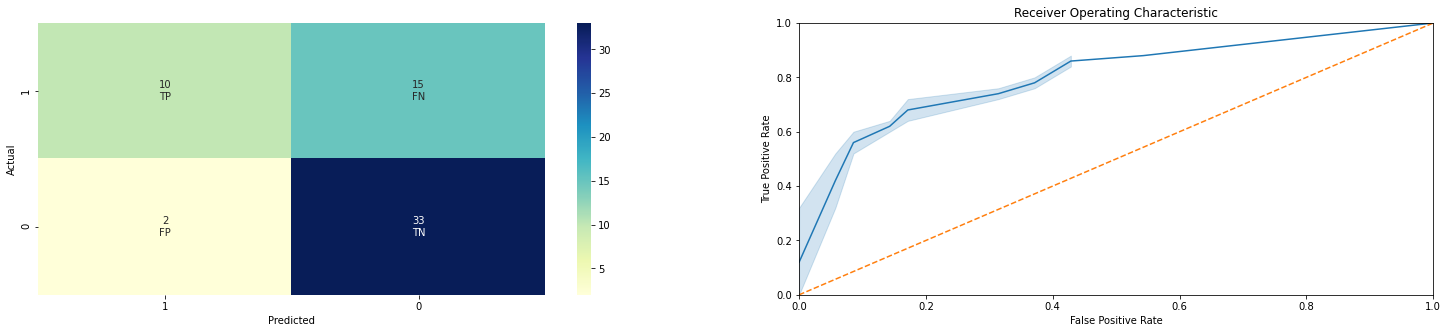

In [74]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric="manhattan", metric_params=None, n_neighbors = 10, weights='distance')

death_event_prediction("K-nearest Neighbors", knn, train_X, test_X, train_y, test_y, plot=True)

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60

Area under the curve:  0.7314285714285714
0.7666666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


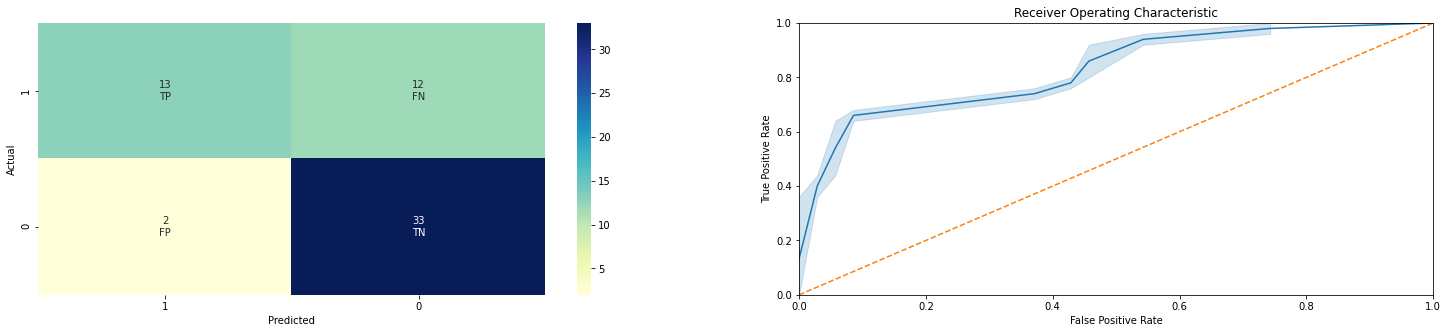

In [75]:
svc = SVC(C=2.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)

death_event_prediction("Support Vector Classifier", svc, train_X, test_X, train_y, test_y, plot=True)

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.63      0.48      0.55        25

    accuracy                           0.67        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.66      0.67      0.66        60

Area under the curve:  0.64
0.6666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


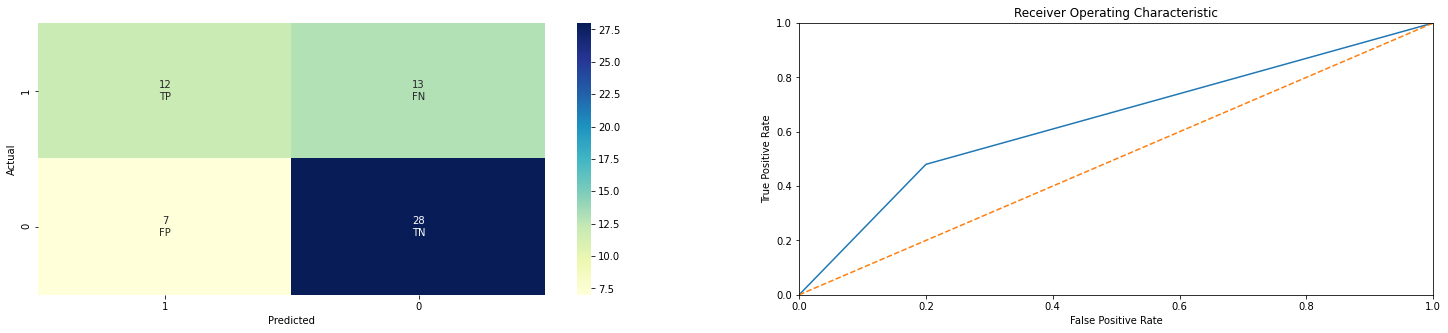

In [76]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, min_impurity_decrease=0, 
                             min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

death_event_prediction("Decision Tree", dtc, train_X, test_X, train_y, test_y, plot=True)

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60

Area under the curve:  0.7457142857142858
0.7833333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


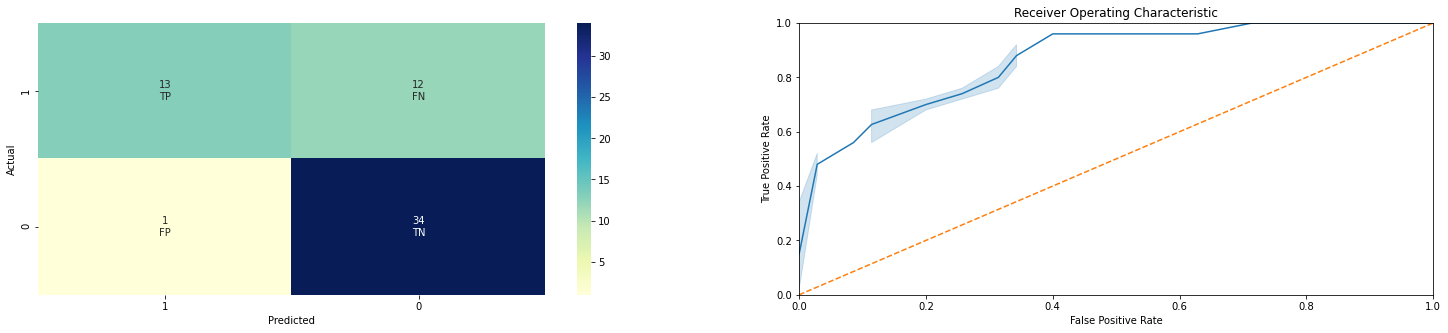

In [77]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 15, criterion = "entropy", 
                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                               bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                               warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

death_event_prediction("Random Forest", rfc,train_X,test_X,train_y,test_y, plot=True) 

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.80      0.64      0.71        25

    accuracy                           0.78        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.79      0.78      0.78        60

Area under the curve:  0.7628571428571429
0.7833333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


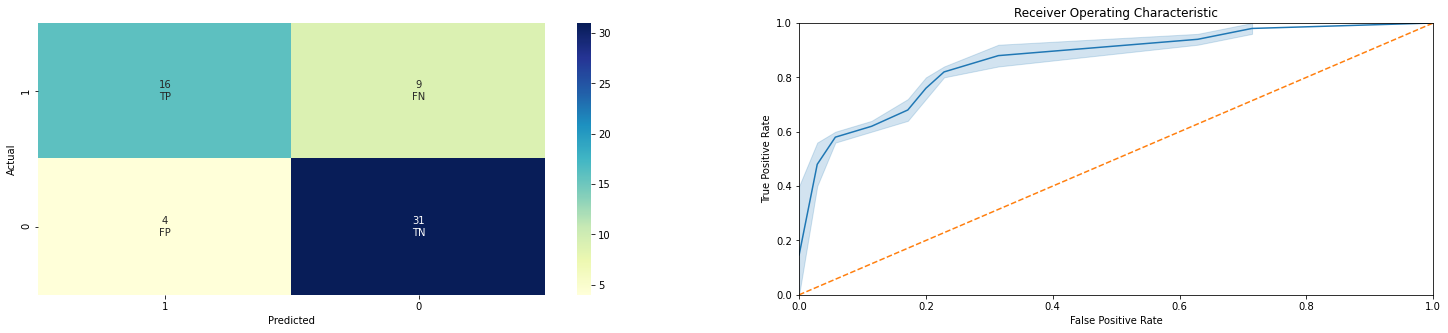

In [78]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
                        max_depth = 16, min_child_weight=1, missing=None, n_estimators=100,
                        objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, subsample=1)

death_event_prediction("XGBoost", xgc, train_X, test_X, train_y, test_y, plot=True)

In [83]:
cnt = 0
for r in range(2):
    for c in range(3):
        try:
            conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
            conf_2 = conf_matrix.astype(str)
            labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
            labels = np.core.defchararray.add(conf_2, labels)
            
            sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[r, c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
            axes[r, c].set(title=list(conf_matrix_all.keys())[cnt])
            cnt += 1
        except:
          pass

**Great Job!**

In [ ]:
Great Job!